In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learning_SWE_427/4K_House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [4]:
print(set(data['Area Type']))
print(set(data['City']))
print(set(data['Tenant Preferred']))
print(set(data['Furnishing Status']))

{'Super Area', 'Built Area', 'Carpet Area'}
{'Hyderabad', 'Chennai', 'Kolkata', 'Delhi', 'Bangalore', 'Mumbai'}
{'Bachelors/Family', 'Family', 'Bachelors'}
{'Unfurnished', 'Semi-Furnished', 'Furnished'}


In [5]:
replacement_vector = {'Carpet Area' : 1, 'Super Area' : 2, 'Built Area' : 3, 'Bangalore' : 4, 
                      'Kolkata' : 5, 'Hyderabad' : 6, 'Mumbai' : 7, 'Chennai' : 8, 'Delhi' : 9, 
                      'Bachelors' : 10, 'Family' : 11, 'Bachelors/Family' : 12, 'Furnished' : 13, 
                      'Semi-Furnished' : 14, 'Unfurnished' : 15}

Y = data['Rent'].values
X1 = data['BHK'].values
X2 = data['Size'].values
dummy_X3 = data['Area Type'].values
dummy_X4 = data['City'].values
dummy_X5 = data['Tenant Preferred'].values
dummy_X6 = data['Furnishing Status'].values
X3 = []
X4 = []
X5 = []
X6 = []
X7 = data['Bathroom'].values

print(len(Y), len(X1), len(X2), len(dummy_X3), len(dummy_X4), len(dummy_X5), len(dummy_X6), len(X7))

m = len(Y)

for i in range(m):
  X3.append(replacement_vector[dummy_X3[i]])
  X4.append(replacement_vector[dummy_X4[i]])
  X5.append(replacement_vector[dummy_X5[i]])
  X6.append(replacement_vector[dummy_X6[i]])
print(X3)
print(X4)
print(X5)
print(X6)

4746 4746 4746 4746 4746 4746 4746 4746
[2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,

In [6]:
t0 = 0
t1 = 0
t2 = 0
t3 = 0
t4 = 0
t5 = 0
t6 = 0
t7 = 0

epoch = 1000
learning_rate = 0.000001

In [7]:
for i in range(epoch):

  cx0 = 0
  cx1 = 0
  cx2 = 0
  cx3 = 0
  cx4 = 0
  cx5 = 0
  cx6 = 0
  cx7 = 0

  for j in range(m):

    cx0 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j])
    cx1 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X1[j] 
    cx2 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X2[j] 
    cx3 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X3[j] 
    cx4 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X4[j] 
    cx5 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X5[j] 
    cx6 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X6[j] 
    cx7 += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) * X7[j] 

  t0 = t0 - learning_rate * (cx0) / m
  t1 = t1 - learning_rate * (cx1) / m
  t2 = t2 - learning_rate * (cx2) / m
  t3 = t3 - learning_rate * (cx3) / m
  t4 = t4 - learning_rate * (cx4) / m
  t5 = t5 - learning_rate * (cx5) / m
  t6 = t6 - learning_rate * (cx6) / m
  t7 = t7 - learning_rate * (cx7) / m

print(t0, t1, t2, t3, t4, t5, t6, t7)


-4.0215687412972825 0.09538251282928813 41.72322044913248 -13.471534636919024 -14.706775421615946 -48.97977699497821 -61.982255791450974 5.473127290644951


In [8]:
total = 0
for j in range(m):
  total += (t0 + t1 * X1[j] + t2 * X2[j] + t3 * X3[j] + t4 * X4[j] + t5 * X5[j] + t6 * X6[j] + t7 * X7[j] - Y[j]) ** 2

cost = total / (m * 2)
cost

2552010964.031792

In [9]:
dummy_prediction = t0 + t1 * 2 + t2 * 1100 + t3 * replacement_vector['Super Area'] + t4 * replacement_vector['Delhi'] + t5 * replacement_vector['Bachelors/Family'] + t6 * replacement_vector['Unfurnished'] + t7 * 2
print(dummy_prediction)

44225.86273603149


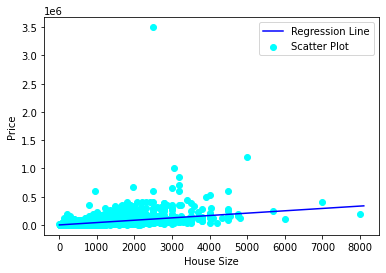

In [11]:
max_x = np.max(X2) + 100
min_x = np.min(X2)
x = np.linspace(min_x, max_x, 1000)
y = t2 * x + t0
plt.plot(x, y, color='blue', label='Regression Line')
plt.scatter(X2, Y, c = "cyan", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()